# Project 8
---

# **GARMIN CONNECT**

<div>
<img src="https://raw.githubusercontent.com/rotemmizrahi/Garmin/main/Image.jpeg" width="600"/>
</div>

### **Presented By**
- Elchanan Cohen
- Ido Elia
- Karin Nisov
- Rotem Mizrahi

### **Data Understanding**:

This dataset contains data from elchanan`s watch, for the past 5 years he using this watch.

We analyzed the data form this site, garmin connect-
https://connect.garmin.com/signin/?service=https%3A%2F%2Fconnect.garmin.com%2Fmodern%2Freport%2F26%2Fwellness%2Flast_year

### **1. Introduction**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [40]:
url1 = "https://raw.githubusercontent.com/rotemmizrahi/Garmin/main/data1.csv"
url2 = "https://raw.githubusercontent.com/rotemmizrahi/Garmin/main/Sleep%20info.csv"

In [3]:
garmin_df = pd.read_csv(url1)
garmin_df

,Activity Type,Year,Month,Date,Hour,Week Day,Distance,Calories,Time,Time in minutes,...,Avg. Swolf,Avg Stroke Rate,Total Reps,Total Sets,Best Lap Time,Number of Laps,Moving Time,Elapsed Time,Min Elevation,Max Elevation
0,Running,2022,August,13/08/2022,22:40,Saturday,2.530,168.0,00:14:32,14.53,...,0,0,0.0,NaN,02:55.82.6,3.0,00:14:14,00:14:32,641,672
1,Running,2022,August,13/08/2022,22:38,Saturday,0.150,6.0,00:01:03,1.05,...,0,0,0.0,NaN,00:02.82.5,2.0,00:58.8,01:02.9,NaN,NaN
2,Strength Training,2022,August,04/08/2022,20:25,Thursday,0.000,140.0,00:32:16,32.27,...,0,0,53.0,8.0,32:15.66.6,1.0,00:28:56,00:32:16,NaN,NaN
3,Strength Training,2022,August,01/08/2022,21:29,Monday,0.000,56.0,00:11:16,11.27,...,0,0,29.0,6.0,11:16.05.2,1.0,07:26.0,00:12:05,NaN,NaN
4,Running,2022,August,01/08/2022,20:48,Monday,3.970,247.0,00:21:17,21.28,...,0,0,0.0,NaN,00:02.83.2,12.0,00:21:04,00:21:17,339,356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,Pool Swimming,2017,August,03/08/2017,15:35,Thursday,0.675,54.0,00:22:12,22.20,...,58,24,0.0,NaN,00:00.0,NaN,00:18:52,00:22:19,NaN,NaN
557,Running,2017,July,29/07/2017,21:12,Saturday,3.670,89.0,00:30:41,30.68,...,0,0,0.0,NaN,00:00.0,NaN,00:30:39,00:30:41,328,382
558,Walking,2017,July,28/07/2017,18:47,Friday,0.770,15.0,00:09:05,9.08,...,0,0,0.0,NaN,00:00.0,NaN,00:08:20,09:04.6,377,403
559,Running,2017,July,28/07/2017,18:24,Friday,2.770,61.0,00:22:08,22.13,...,0,0,0.0,NaN,00:00.0,NaN,00:21:39,00:22:10,324,381


In [4]:
sleep_df = pd.read_csv(url2)
sleep_df

,month,average hours,hh:mm
0,January,8.303333,08:18
1,February,7.833333,07:50
2,March,8.000000,08:00
3,April,7.833333,07:50
4,May,7.396667,07:23
5,June,7.512500,07:30
6,July,7.475000,07:28
7,August,7.162500,07:09
8,September,7.425000,07:25
9,October,7.862500,07:51


In [5]:
garmin_df.columns

Index(['Activity Type', 'Year', 'Month', 'Date', 'Hour', 'Week Day',
       'Distance', 'Calories', 'Time', 'Time in minutes', 'Avg HR', 'Max HR',
       'Aerobic TE', 'Avg Run Cadence', 'Max Run Cadence', 'Avg Pace',
       'avg in minutes', 'Best Pace', 'Total Ascent', 'Total Descent',
       'Avg Stride Length', 'Total Strokes', 'Avg. Swolf', 'Avg Stroke Rate',
       'Total Reps', 'Total Sets', 'Best Lap Time', 'Number of Laps',
       'Moving Time', 'Elapsed Time', 'Min Elevation', 'Max Elevation'],
      dtype='object')

In [6]:
garmin_df1 = garmin_df.replace('Other','Ski', regex=True)
garmin_df1["Activity Type"].unique()

array(['Running', 'Strength Training', 'Pool Swimming', 'Track Running',
       'Ski', 'Treadmill Running', 'Cycling', 'Indoor Running', 'Cardio',
       'Open Water Swimming', 'Cross Country Classic Skiing',
       'Trail Running', 'Resort Skiing/Snowboarding', 'Walking'],
      dtype=object)

---

### **2. insight 1 - Calories per Activity**

In [7]:
garmin_df1.dtypes

Activity Type         object
Year                   int64
Month                 object
Date                  object
Hour                  object
Week Day              object
Distance             float64
Calories             float64
Time                  object
Time in minutes      float64
Avg HR                 int64
Max HR                 int64
Aerobic TE           float64
Avg Run Cadence      float64
Max Run Cadence      float64
Avg Pace              object
avg in minutes       float64
Best Pace             object
Total Ascent          object
Total Descent         object
Avg Stride Length    float64
Total Strokes        float64
Avg. Swolf             int64
Avg Stroke Rate        int64
Total Reps           float64
Total Sets           float64
Best Lap Time         object
Number of Laps       float64
Moving Time           object
Elapsed Time          object
Min Elevation         object
Max Elevation         object
dtype: object

In [8]:
garmin_df1["Calories"] = garmin_df1["Calories"].fillna(garmin_df1["Calories"].mean())

In [9]:
garmin_df2 = garmin_df1.groupby("Activity Type")["Calories"].mean().sort_values(ascending = False).reset_index()
garmin_df2

,Activity Type,Calories
0,Cycling,499.666667
1,Running,316.564978
2,Ski,311.416667
3,Resort Skiing/Snowboarding,243.526022
4,Cross Country Classic Skiing,243.526022
5,Treadmill Running,223.666667
6,Open Water Swimming,192.263011
7,Pool Swimming,145.797872
8,Strength Training,72.076923
9,Track Running,59.000000


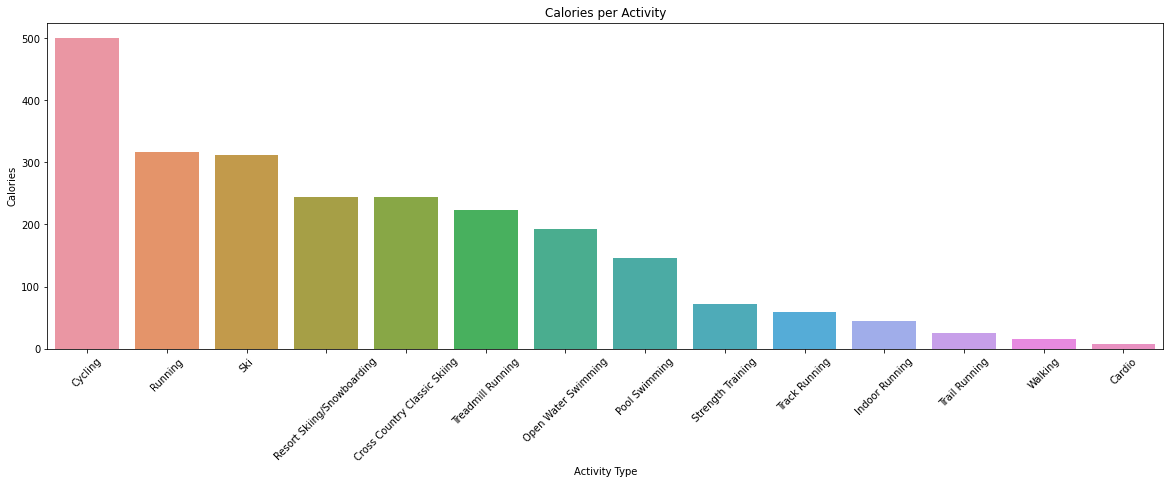

In [44]:
plt.subplots(figsize=(20,6))
ax = sns.barplot(data = garmin_df2, x="Activity Type" , y="Calories")
plt.xticks(rotation = 45)
plt.title("Calories per Activity")
plt.show()

we can see that the activity type he Burned the most calories is - **Cycling**

<div>
<img src="https://raw.githubusercontent.com/rotemmizrahi/Garmin/main/Image3.jpeg" width="300"/>
</div>

---

### **3. insight 2 - Solider VS Student**

In [11]:
soldier_df = garmin_df1.loc[(garmin_df1.Year >= 2017) & (garmin_df.Year <= 2020)]
student_df = garmin_df1.loc[(garmin_df1.Year >= 2020)]

In [12]:
soldier_df['stage'] = 'soldier'
student_df['stage'] = 'student'
df_sol_stu = pd.concat([soldier_df, student_df])
df_sol_stu

<ipython-input-12-9d2edb9ffa7e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soldier_df['stage'] = 'soldier'
<ipython-input-12-9d2edb9ffa7e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  student_df['stage'] = 'student'


,Activity Type,Year,Month,Date,Hour,Week Day,Distance,Calories,Time,Time in minutes,...,Avg Stroke Rate,Total Reps,Total Sets,Best Lap Time,Number of Laps,Moving Time,Elapsed Time,Min Elevation,Max Elevation,stage
326,Running,2020,December,30/12/2020,20:33,Wednesday,5.65,390.0,00:25:57,25.95,...,0,0.0,NaN,02:49.17.7,6.0,00:25:57,00:25:57,326,383,soldier
327,Running,2020,December,28/12/2020,20:47,Monday,4.19,274.0,00:21:05,21.08,...,0,0.0,NaN,00:52.90.9,5.0,00:21:02,00:21:05,323,440,soldier
328,Running,2020,December,22/12/2020,21:03,Tuesday,4.01,276.0,00:24:33,24.55,...,0,0.0,NaN,00:02.2,5.0,00:24:31,00:24:33,348,395,soldier
329,Running,2020,December,19/12/2020,18:37,Saturday,5.75,394.0,00:35:05,35.08,...,0,0.0,NaN,04:33.07.9,6.0,00:35:04,00:35:05,330,396,soldier
330,Running,2020,December,16/12/2020,19:22,Wednesday,7.01,477.0,00:33:19,33.32,...,0,0.0,NaN,00:03.06.5,8.0,00:33:06,00:33:19,20,98,soldier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,Pool Swimming,2020,January,22/01/2020,19:34,Wednesday,0.50,93.0,00:13:44,13.73,...,22,0.0,NaN,00:01.07.2,5.0,00:11:27,00:19:04,NaN,NaN,student
443,Running,2020,January,18/01/2020,18:11,Saturday,5.05,336.0,00:31:08,31.13,...,0,0.0,NaN,00:01.01.4,9.0,00:31:06,00:31:18,347,392,student
444,Running,2020,January,14/01/2020,21:49,Tuesday,2.74,179.0,00:18:24,18.40,...,0,0.0,NaN,05:03.79.4,3.0,00:18:24,00:18:27,343,401,student
445,Running,2020,January,11/01/2020,19:09,Saturday,8.02,547.0,00:37:49,37.82,...,0,0.0,NaN,00:04.84.6,9.0,00:37:46,00:37:49,326,390,student


In [13]:
df_sol_stu['Activity Type'].unique()

array(['Running', 'Cycling', 'Pool Swimming', 'Open Water Swimming',
       'Cross Country Classic Skiing', 'Trail Running',
       'Resort Skiing/Snowboarding', 'Treadmill Running', 'Walking',
       'Strength Training', 'Track Running', 'Ski', 'Indoor Running',
       'Cardio'], dtype=object)

In [14]:
df_sol_stu = df_sol_stu.loc[(df_sol_stu['Activity Type'] == 'Running') | (df_sol_stu['Activity Type'] == 'Cycling') | (df_sol_stu['Activity Type'] == 'Pool Swimming')]

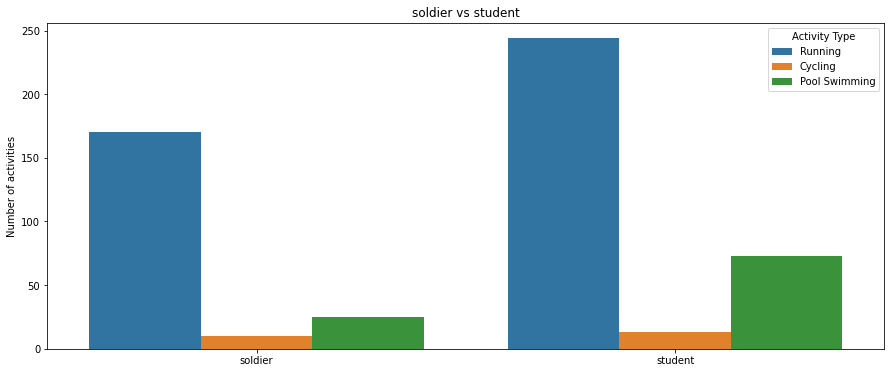

In [48]:
plt.subplots(figsize=(15,6))
ax = sns.countplot(x="stage", hue="Activity Type",  data=df_sol_stu)
plt.title("soldier vs student")
plt.ylabel("Number of activities")
plt.xlabel(" ")
plt.show()

we can see that there is a **difference between the number of ativities he made as a solider vs as a student**.

We did not expect this result but Elhanan explanation is that as a student he enjoyed playing sports more than as a soldier, because in that time he performed the activitys of his duty as a fighter.

---

### **4. insight 3 - Distance per Time**

In [16]:
garmin_df1["Time"] = pd.to_datetime(garmin_df1["Time"])#, format= "%HH:%MM:%SS")

In [17]:
garmin_df1["Distance"].head()

0    2.53
1    0.15
2    0.00
3    0.00
4    3.97
Name: Distance, dtype: float64

In [18]:
garmin_df1["Distance"].astype("float64")

0      2.530
1      0.150
2      0.000
3      0.000
4      3.970
       ...  
556    0.675
557    3.670
558    0.770
559    2.770
560    3.190
Name: Distance, Length: 561, dtype: float64

In [19]:
garmin_df1[['Time in minutes']].dtypes

Time in minutes    float64
dtype: object

In [20]:
garmin_df1['Time'] = pd.to_datetime(garmin_df1.Time, format="%S:%H:%M").dt.time

In [21]:
garmin_df1[["Distance",'Time']]

,Distance,Time
0,2.530,00:14:32
1,0.150,00:01:03
2,0.000,00:32:16
3,0.000,00:11:16
4,3.970,00:21:17
...,...,...
556,0.675,00:22:12
557,3.670,00:30:41
558,0.770,00:09:05
559,2.770,00:22:08


In [22]:
garmin_df1.groupby(['Year'])[["Distance"]].sum().reset_index() 

,Year,Distance
0,2017,11.075
1,2018,65.460
2,2019,374.480
3,2020,613.976
4,2021,565.035
5,2022,342.265


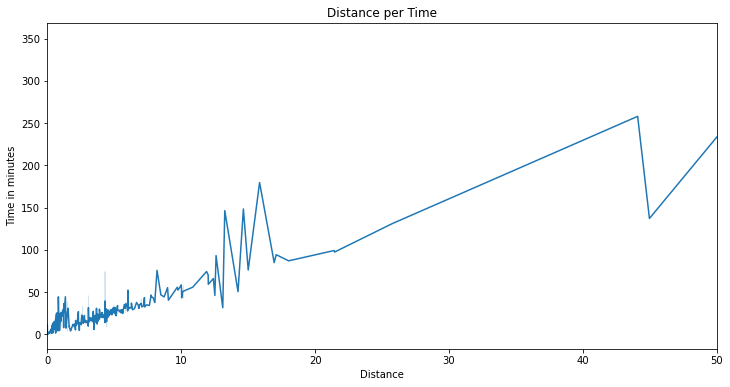

In [50]:
plt.figure(figsize=(12,6))
ax = sns.lineplot(data = garmin_df1, x = 'Distance', y = 'Time in minutes')
ax.set(xlim=(0, 50))
plt.title('Distance per Time')
plt.show()

The connection between the Distance he passed over the time in minutes.

we can see an upward trend and noises in the plot-


Text(0.5, 1.0, 'Distance per Time')

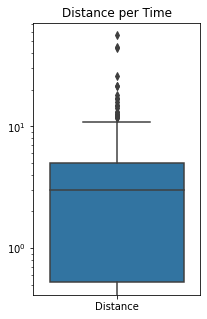

In [53]:
plt.figure(figsize=(3,5))
ax = sns.boxplot(data = garmin_df1[['Distance']])
ax.set_yscale("log")
plt.title('Distance per Time')

In [25]:
garmin_df1[['Distance', 'Activity Type']].sort_values(by= ['Distance'], ascending = False).head()

,Distance,Activity Type
91,56.15,Ski
343,44.96,Cycling
92,44.08,Ski
94,25.77,Ski
513,21.45,Running


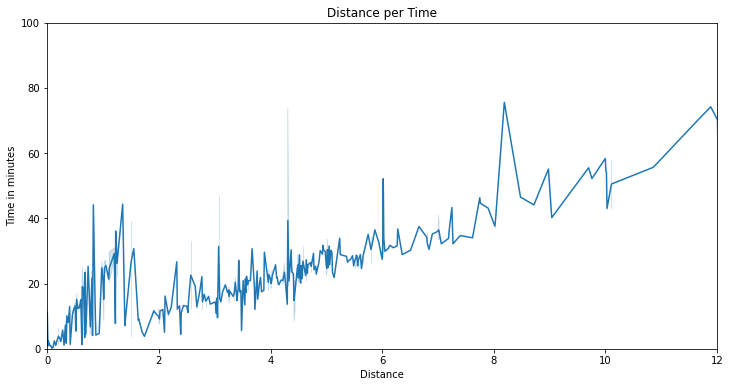

In [54]:
plt.figure(figsize=(12,6))
ax = sns.lineplot(data = garmin_df1, x = 'Distance', y = 'Time in minutes')
ax.set(xlim=(0, 12))
ax.set(ylim=(0,100))
#ax.set_yscale("log")
plt.title('Distance per Time')
plt.show()

We focused on the values without the unusual noises.

Now we want to see The connection-  

In [27]:
features = ['Distance', 'Time in minutes']
corr_matrix = garmin_df1[features].corr(method = 'spearman')
corr_matrix

,Distance,Time in minutes
Distance,1.000000,0.771385
Time in minutes,0.771385,1.000000


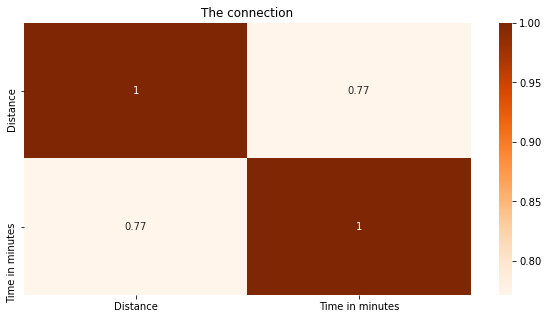

In [55]:
plt.figure(figsize = (10, 5))
ax = sns.heatmap(data = corr_matrix, cmap = 'Oranges', annot = True)
ax.set_title("The connection")
plt.show()

We can see that there is a **strong connection of 0.77**.

---

### **5. insight 4 - Running**

<div>
<img src="https://raw.githubusercontent.com/rotemmizrahi/Garmin/main/image2.jpeg" width="400"/>
</div>

In [29]:
running_info = garmin_df1.loc[garmin_df1['Activity Type'] == "Running"]
running_info['Distance'] = running_info['Distance'].round().sort_values(ascending = False)
running_info.head()

<ipython-input-29-7a39668ac0b6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  running_info['Distance'] = running_info['Distance'].round().sort_values(ascending = False)


,Activity Type,Year,Month,Date,Hour,Week Day,Distance,Calories,Time,Time in minutes,...,Avg. Swolf,Avg Stroke Rate,Total Reps,Total Sets,Best Lap Time,Number of Laps,Moving Time,Elapsed Time,Min Elevation,Max Elevation
0,Running,2022,August,13/08/2022,22:40,Saturday,3.0,168.0,00:14:32,14.53,...,0,0,0.0,NaN,02:55.82.6,3.0,00:14:14,00:14:32,641,672
1,Running,2022,August,13/08/2022,22:38,Saturday,0.0,6.0,00:01:03,1.05,...,0,0,0.0,NaN,00:02.82.5,2.0,00:58.8,01:02.9,NaN,NaN
4,Running,2022,August,01/08/2022,20:48,Monday,4.0,247.0,00:21:17,21.28,...,0,0,0.0,NaN,00:02.83.2,12.0,00:21:04,00:21:17,339,356
5,Running,2022,August,01/08/2022,20:40,Monday,1.0,46.0,00:04:28,4.47,...,0,0,0.0,NaN,04:27.59.7,1.0,00:04:27,04:27.6,343,356
7,Running,2022,July,30/07/2022,23:11,Saturday,2.0,166.0,00:13:16,13.27,...,0,0,0.0,NaN,02:22.72.2,3.0,00:13:11,00:14:28,349,377


In [30]:
running_info_groupby = running_info.groupby("Distance").agg({"avg in minutes":"min", "Calories":"max","Avg HR":"max"}).reset_index()
running_info_groupby

,Distance,avg in minutes,Calories,Avg HR
0,0.0,2.63,243.526022,131
1,1.0,4.70,118.000000,150
2,2.0,3.82,319.000000,158
3,3.0,3.87,236.000000,173
4,4.0,4.08,311.000000,174
5,5.0,4.15,466.000000,171
6,6.0,4.37,466.000000,184
7,7.0,4.43,633.000000,176
8,8.0,4.47,572.000000,176
9,9.0,4.45,614.000000,173


In [31]:
new_df = running_info_groupby.loc[(running_info_groupby["Distance"] == 5) | (running_info_groupby["Distance"] == 10) | (running_info_groupby["Distance"] == 21)]
new_df

,Distance,avg in minutes,Calories,Avg HR
5,5.0,4.15,466.0,171
10,10.0,4.25,689.0,161
15,21.0,4.53,1484.0,182


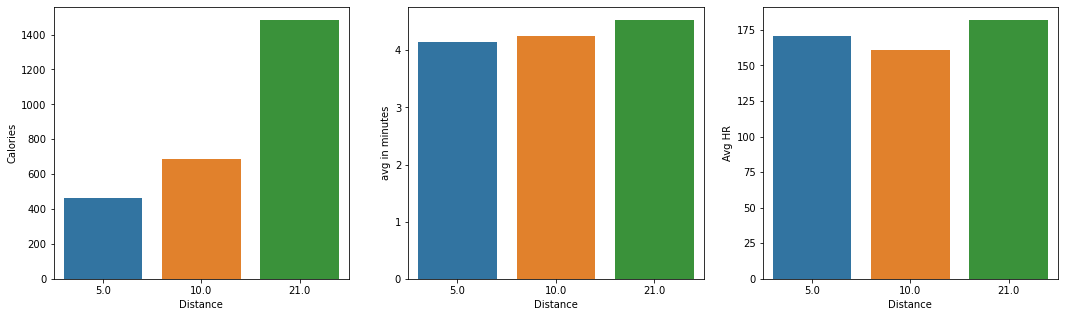

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
ax = sns.barplot(ax = axes[0], data = new_df, x='Distance', y='Calories')
ax = sns.barplot(ax = axes[1], data = new_df, x='Distance', y='avg in minutes')
ax = sns.barplot(ax = axes[2], data = new_df, x='Distance', y='Avg HR')
plt.show()

Here we focused only on the running data and made a comparison between 5km, 10km, 21km by measure the calories, avg in minutes ang avg HR.

---

### **6. insight 5 - Correlation**

In [33]:
x = garmin_df1[['Avg HR','Calories','Distance','Time in minutes']]
x

,Avg HR,Calories,Distance,Time in minutes
0,152,168.0,2.530,14.53
1,114,6.0,0.150,1.05
2,98,140.0,0.000,32.27
3,103,56.0,0.000,11.27
4,156,247.0,3.970,21.28
...,...,...,...,...
556,0,54.0,0.675,22.20
557,0,89.0,3.670,30.68
558,0,15.0,0.770,9.08
559,0,61.0,2.770,22.13


In [34]:
x.corr()

,Avg HR,Calories,Distance,Time in minutes
Avg HR,1.000000,-0.181981,-0.172050,-0.082720
Calories,-0.181981,1.000000,0.857692,0.746104
Distance,-0.172050,0.857692,1.000000,0.888249
Time in minutes,-0.082720,0.746104,0.888249,1.000000


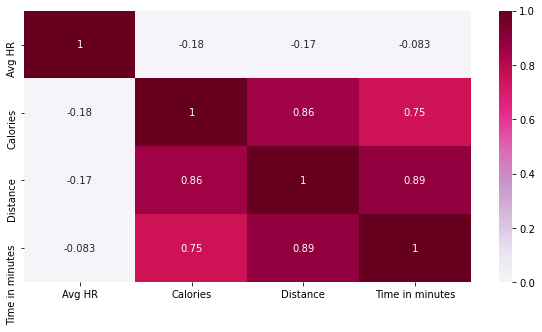

In [35]:
plt.figure(figsize = (10, 5))
sns.heatmap(x.corr(), vmin=0.0 , vmax = 1,cmap='PuRd' , annot=True);